# Statistical Power

Statistical power is a measure of a test's ability to detect an effect/difference when an effect/difference actually exists. 

We have already discussed how the null hypothesis significance testing (NHST) procedure, when followed rigorously, offers control over the false positive rate: how often we will detect a difference when one does not, in reality, exist.  Power addresses the other side of the question, how often will we detect a difference when one really does exist?

## Part 1: Introduction to Power

A common application domain for NHST is in [manufacturing control](https://en.wikipedia.org/wiki/Statistical_process_control).  When we have a plant that produces a certain object, we want to develop automatic processes that will alert us when we begin manufacturing objects outside of normal tolerances.

Suppose you are a manufacturing engineer in charge of a plant that manufactures bottles of [Coca-Cola](https://en.wikipedia.org/wiki/Coca-Cola).  Each bottle of Coca-Cola should weigh 20.4 ounces (20 ounces of product, 0.4 ounces of bottle).  Of course, due to random fluctuations, bottles will not weigh *exactly* 20.4 ounces, but we do not want to be manufacturing bottles that systematically weigh more or less than this target amount.

The management of Coca-Cola have set a standard that bottles should weigh, on average, within 0.1 ounces of this target.  You have collected a sample of bottles manufactured at your plant, and your goal for the day is to test if your plant is manufacturing bottles within the company's tolerances.

You have collected a simple random sample of 130 bottles of coke from your plant, and weighed them.

https://github.com/GalvanizeDataScience/statistical-power/blob/master/assignment.md

In [1]:
import scipy.stats as stats
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

1. Load the data in with `numpy.loadtxt('data/coke_weights.txt')`.  Visualize the data with either a scatterplot (with jitter) or a histogram.  Does it look like there is cause for concern?

(array([ 2.,  2.,  2.,  7., 11., 18., 18., 23., 10., 17., 14.,  1.,  3.,
         1.,  1.]),
 array([17.8997734 , 18.26202547, 18.62427753, 18.98652959, 19.34878165,
        19.71103371, 20.07328577, 20.43553783, 20.79778989, 21.16004195,
        21.52229401, 21.88454607, 22.24679813, 22.60905019, 22.97130225,
        23.33355431]),
 <a list of 15 Patch objects>)

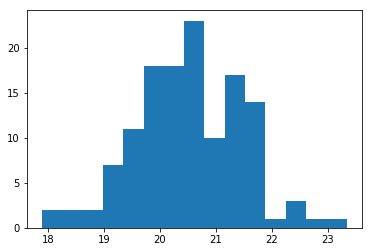

In [3]:
# load the dataset 
coke_data = np.loadtxt('/home/asus/G_school_lectures/Week_4_Lectures/statistical-power/data/coke_weights.txt')
# basic plot to check distribution
plt.hist(coke_data,bins = 15)
# no cause for concern with dataset

2. You would like to design a NHST that will notify you when bottles are being manufactured that systematically differ from 20.4 ounces.  State a null hypothesis appropriate for the problem.

H0: Bottles are not different from 20.4 ounces
Or H0: Mean(Bottles) - 20.4 = 0 


3. State an alternate hypothesis.  Is a one tailed or two tailed test appropriate for your goals?

H1: Bottles are different from 20.4 ounces
Or H1: Mean(Bottles) - 20.4 != 0

Two tailed test is approirate because we wan't to know if the bottle
Weight differs on either side of the distribution

4. What is the distribution of your sample average under the null hypothesis assumption?  What result tells you this?


In [6]:
 def bootstrap_mean(data, resamples = 5000):
        bootstrap_means = []
        for i in range(resamples):
            sample = np.random.choice(data, size=len(data))
            sample_means = np.mean(sample)
            bootstrap_means.append(sample_means)
        return bootstrap_means
        

In [7]:
mean_dist = bootstrap_mean(data = coke_data)

Text(0.5, 1.0, 'Histogram of Coke Weight: $\\mu=20.5$, $\\sigma=0.084$')

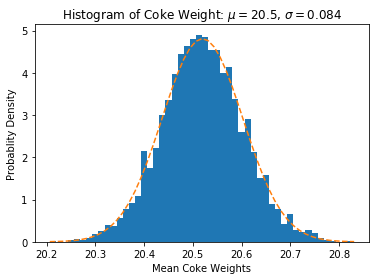

In [8]:
# with boostrap data
mu = np.mean(mean_dist)
sigma = np.sqrt(np.var(mean_dist))
num_bins = 50

fig, ax = plt.subplots()

# histogram of data
n, bins, patches = ax.hist(mean_dist, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Mean Coke Weights')
ax.set_ylabel('Probablity Density')
ax.set_title('Histogram of Coke Weight: $\mu=20.5$, $\sigma=0.084$')

In [9]:
def normal_ploting(data):
    mu = np.mean(data)
    variance = np.var(data)
    SE =np.sqrt(variance /len(data))
    
    h0 = stats.norm(loc=20.4, scale = SE)
    
    # main figures
    fig, ax = plt.subplots(1, figsize=(10,4))
    x = np.linspace(20.4 - 4*SE, 20.4 + 4*SE, num=250)
    
    pdf_h0 = h0.pdf(x)
    ax.plot(x, pdf_h0, linewidth=3)
 
    ax.set_xlabel('Mean Coke Weights')
    ax.set_ylabel('Probablity Density')
    ax.set_title('H0 and H1 Distribution of Coke Bottle Weights')
    
    return


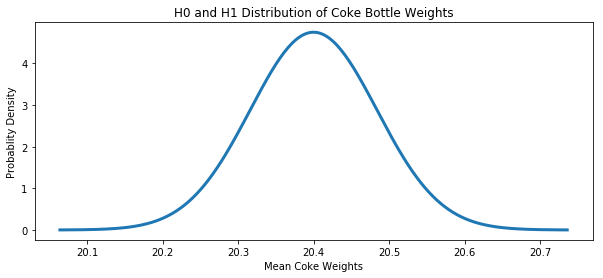

In [10]:
normal_ploting(data = coke_data)

distribution is normal as shown above

5. Use `scipy` to make a random variable of the sampling distribution of the mean under the null hypothesis. Plot the PDF over `+/- 4 standard error`. 

In [12]:
x = mu + sigma *np.random.randn(1)

In [13]:
SE = sigma / np.sqrt(len(mean_dist))

In [14]:
print('Upper bound is {}'.format(x+SE*4))
print('Lower bound is {}'.format(x-SE*4))

Upper bound is [20.64238358]
Lower bound is [20.63299479]


6. According to company standards, we would like our test to detect when the mean of our manufactured bottles is 0.1 ounce more than the desired mean of 20.4 (the *more than* is a simplifying assumption, which allows us to focus on a one tailed test).  Plot the sampling distribution of the data under the *alternate* hypothesis that the mean is `20.4 + 0.1`.

In [15]:
def normal_ploting(data):
    mu = np.mean(data)
    variance = np.var(data)
    SE =np.sqrt(variance /len(data))
    
    h0 = stats.norm(loc=20.4, scale = SE)
    h1 = stats.norm(loc = 20.5, scale = SE)
    
    h0_pvalue_right = h0.ppf(1-0.025)
    h0_pvalue_left = h0.ppf(0.025)
    
    # main figures
    fig, ax = plt.subplots(1, figsize=(10,4))
    x = np.linspace(20.4 - 4*SE, 20.4 + 4*SE, num=250)
    
    pdf_h0 = h0.pdf(x)
    pdf_h1 = h1.pdf(x)
    ax.plot(x, pdf_h0, linewidth=3)
    ax.plot(x, pdf_h1, linewidth=3)
    
    ax.set_xlabel('Mean Coke Weights')
    ax.set_ylabel('Probablity Density')
    ax.set_title('H0 and H1 Distribution of Coke Bottle Weights')
    
    
    return

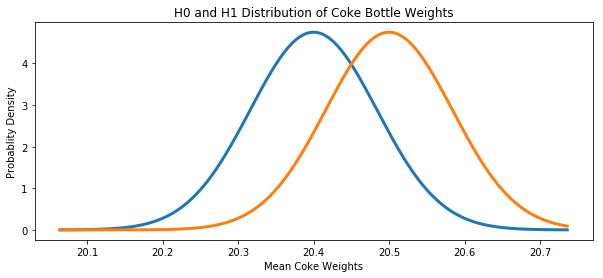

In [16]:
normal_ploting(data=coke_data)

7. Plot a vertical line to indicate the bounds for rejecting the null hypothesis assuming a significance level of 0.05. Based on the bounds for rejecting the null, what conclusion
can we draw based on the sample of 130 bottles of Coca-Cola?

In [21]:
mu = np.mean(coke_data)
variance = np.var(coke_data)
SE =np.sqrt(variance /len(coke_data))

h0 = stats.norm(loc=20.4, scale = SE)
h1 = stats.norm(loc = 20.5, scale = SE)

critical_value_right = h0.ppf(1 - 0.025)
critical_value_left = h0.ppf(0.025)



In [17]:
def normal_ploting(data):
    mu = np.mean(data)
    variance = np.var(data)
    SE =np.sqrt(variance /len(data))
    
    h0 = stats.norm(loc=20.4, scale = SE)
    h1 = stats.norm(loc = 20.5, scale = SE)
    
    h0_pvalue_right = h0.ppf(1-0.025)
    h0_pvalue_left = h0.ppf(0.025)
    
    # main figures
    fig, ax = plt.subplots(1, figsize=(10,4))
    x = np.linspace(20.4 - 4*SE, 20.4 + 4*SE, num=250)
    
    pdf_h0 = h0.pdf(x)
    pdf_h1 = h1.pdf(x)
    ax.plot(x, pdf_h0, linewidth=3)
    ax.plot(x, pdf_h1, linewidth=3)
    
    ax.axvline(h0_pvalue_right, color="grey", linestyle="--")
    ax.axvline(h0_pvalue_left, color="grey", linestyle="--")
    ax.axvline(mu, color='black', linewidth=3)
    
    pos_v = x[x >= h0_pvalue_right]
    ax.fill_between(pos_v, 0, h0.pdf(pos_v))
    
    neg_v = x[x <= h0_pvalue_left]
    ax.fill_between(neg_v, 0, h0.pdf(neg_v))
    
    ax.set_xlabel('Mean Coke Weights')
    ax.set_ylabel('Probablity Density')
    ax.set_title('H0 and H1 Distribution of Coke Bottle Weights')
    
    
    return

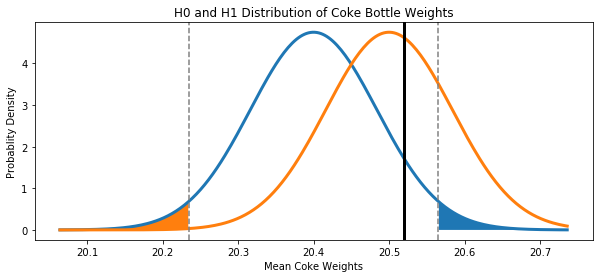

In [18]:
normal_ploting(data=coke_data)

In [ ]:
# Fail to reject H0 because mu lies outside the rejection region 

8. Build a 95% confidence interval based on the sample data. Does your interval suggest that the weight of a bottle of coke is different than 20.4 ounces? Explain what a false negative is in the context of this problem.

In [23]:
standard_critical_value = stats.norm().ppf(1-0.025)

left_endpoint = mu - standard_critical_value*SE
right_endpoint = mu + standard_critical_value*SE

print("95% confidence interval for the population mean: [{:2.4}, {:2.4}]".format(
    left_endpoint, right_endpoint))

95% confidence interval for the population mean: [20.36, 20.68]




There is a 95% chance that this interval contains true mean weight of coke bottles manufactured at our plant. Since the interval contains the null assumption that $\mu_{\text{bottle weight}} = 20.4$, we cannot conclude from the confidence interval that the true mean weight is different than 20.4.

9. Compute the power of the test to detect that your process is manufacturing bottles which are, on average, overweight by 0.1 ounces.  Shade the area under the alternate hypothesis distribution that indicates the power of the test.

In [38]:
def normal_ploting(data):
    mu = np.mean(data)
    variance = np.var(data)
    SE =np.sqrt(variance /len(data))
    
    h0 = stats.norm(loc=20.4, scale = SE)
    h1 = stats.norm(loc = 20.5, scale = SE)
    
    h0_pvalue_right = h0.ppf(1-0.025)
    h0_pvalue_left = h0.ppf(0.025)
    
    h1_pvalue_right = h1.ppf(0.78)
    
    
    
    # main figures
    fig, ax = plt.subplots(1, figsize=(10,4))
    x = np.linspace(20.4 - 4*SE, 20.4 + 4*SE, num=250)
    
    pdf_h0 = h0.pdf(x)
    pdf_h1 = h1.pdf(x)
    ax.plot(x, pdf_h0)
    ax.plot(x, pdf_h1)
    
    ax.axvline(h0_pvalue_right, color="grey", linestyle="--")
    ax.axvline(h0_pvalue_left, color="grey", linestyle="--")
    
    
    pos_v = x[x >= h1_pvalue_right]
    ax.fill_between(pos_v, 0, h1.pdf(pos_v), 
                    color= color_cycle[1], alpha=0.2 )
    

    
    ax.set_xlabel('Mean Coke Weights')
    ax.set_ylabel('Probablity Density')
    ax.set_title('H0 and H1 Distribution of Coke Bottle Weights')
    
    
    return

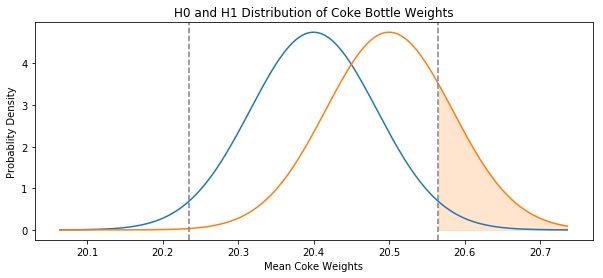

In [39]:
normal_ploting(data = coke_data)

In [36]:
critical_value_right = h0.ppf(1-0.025)
ciritical_value_left = h0.ppf(0.025)
power = h1.cdf(critical_value_left) + (1 - h1.cdf(critical_value_right))

In [37]:
power

0.22164081866034158

## Part 2: Factors that Influence Power of a Test

Statistical power is affected by a number of factors, including the **sample
size**, the **effect size you wish to detect**, the amount of **variance** in
the population, and the desired **significance level** of the test. Here we are
going to explore the effect of these factors on power.

<br>

1. Write a function `compute_power` that includes all the steps in `Part 1`.  Test it by using it to re-compute the power from `Part 1`.

In [40]:
def compute_power(n, sigma, alpha, mu0, mua):
    """
    Compute the statistical power of a standard z-test.

    Parameters
    ----------

    n: int
      Sample size.  Must be a positive number.

    sigma: float
      Population standard deviation.  Must be a positive number.

    alpha: float
      Significance level.  Must be between zero and one.

    mu0: float
      Assumed population mean under the null hypothesis.

    mua: float
      Assumed population mean under the alternate hypothesis.
      """
    SE = sigma / np.sqrt(n)
    
    h0 = stats.norm(loc=mu0, scale=SE)
    h1 = stats.norm(loc=mua, scale=SE)
    
    critical_value_right = h0.ppf(1-alpha/2)
    critical_value_left = h0.ppf(alpha/2)
    power = h1.cdf(critical_value_left) + (1-h1.cdf(critical_value_right))
    
    return power

In [45]:
n = len(coke_data)
sigma = np.sqrt(np.var(coke_data))

In [44]:
compute_power(n=n, sigma=sigma, alpha=0.05, mu0=20.4, mua=20.5)

0.22164081866034158

2. Let's call the difference between `mua` and `mu0` the **hypothesized effect size**, it is the size of an effect we would like our test to be able to detect.  Make a plot of the hypothesized effect size vs. the power of the test.